# Computer Vision Assignment I

# Importing Modules

In [299]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Calcultate Color Map
A function that generates an Index Map with it's corresponding Color Map; given an image.

In [300]:
def CalculateColorMap(image: Image) -> tuple[np.ndarray, dict]:
    width, height = image.size

    Counter = 0
    IndexMap = np.zeros((height, width), dtype=np.int32)
    ColorMap = {}

    for i in range(width):
        for j in range(height):
            r, g, b = image.getpixel((i, j))
            
            if (r, g, b) not in ColorMap:
                ColorMap[(r, g, b)] = Counter
                Counter += 1
            
            IndexMap[j][i] = ColorMap[(r, g, b)]
    
    return IndexMap, ColorMap
    


# Quantization Levels
A function that applies a given quantization value $n$ to a provided Color Map.
Vectors that satisfy the following claus are being, quantized to the same vector.
$$ (| r_2 - r_1 | \leq n) \land (| g_2 - g_1 | \leq n) \land (| b_2 - b_1 | \leq n) $$

In [301]:
def QuantizationLevels(colorMap: dict, n: int) -> tuple[dict, dict]:
    quantizationList = []
    removedColors = {}

    quantizationList.append(colorMap.popitem())

    while colorMap:
        color, index = colorMap.popitem()

        for record in quantizationList:
            recordColor = record[0]
            recordIndex = record[1]

            if abs(recordColor[0] - color[0]) <= n and abs(recordColor[1] - color[1]) <= n and abs(recordColor[2] - color[2]) <= n:
                removedColors[index] = recordIndex
        
        if index not in removedColors:
            quantizationList.append((color, index))
    
    quantizationColorMap = {}
    for record in quantizationList:
        quantizationColorMap[record[0]] = record[1]

    return (quantizationColorMap, removedColors)

        

# Adjust Index
A function used to substitute the indices in an Index Map that don't have a related color value; given a Color Map. 

In [302]:
def AdjustIndex(indexMap: np.ndarray, removedColor: dict) -> np.ndarray:
    adjustedIndexMap = np.zeros(indexMap.shape, dtype=np.int32)

    for i, j in np.ndindex(indexMap.shape):
        if indexMap[i, j] in removedColor:
            adjustedIndexMap[i, j] = removedColor[indexMap[i, j]]
        else:
            adjustedIndexMap[i, j] = indexMap[i, j]
    
    return adjustedIndexMap

# Reverse Color Map
A function intended to reverse a dectionary (Color map) where the keys are the indices and the values are the colors.

In [303]:
def ReverseColorMap(colorMap: dict) -> dict:
    return {value: key for (key, value) in colorMap.items()}

# Color Map to Image
A function that generates an image using an inversed Color Map and it's correpsonding Index Map

In [304]:
def ColorMapToImage(indexMap: np.ndarray, colorMap: dict) -> Image:
    height, width = indexMap.shape
    image = Image.new(mode='RGB', size=(width, height))

    for i in range(height):
        for j in range(width):
            image.putpixel((j, i), colorMap[indexMap[i, j]])
    
    return image

# First Sample Image

## Quantization Level = 10

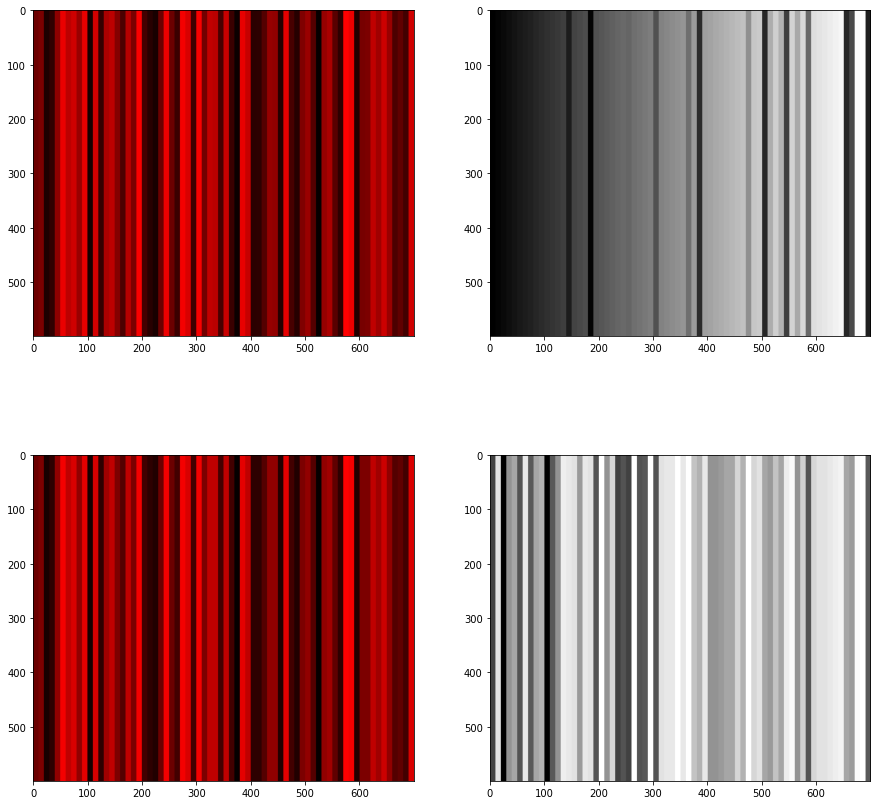

In [305]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/First Sample.bmp')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 10)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

## Quantization Level = 20

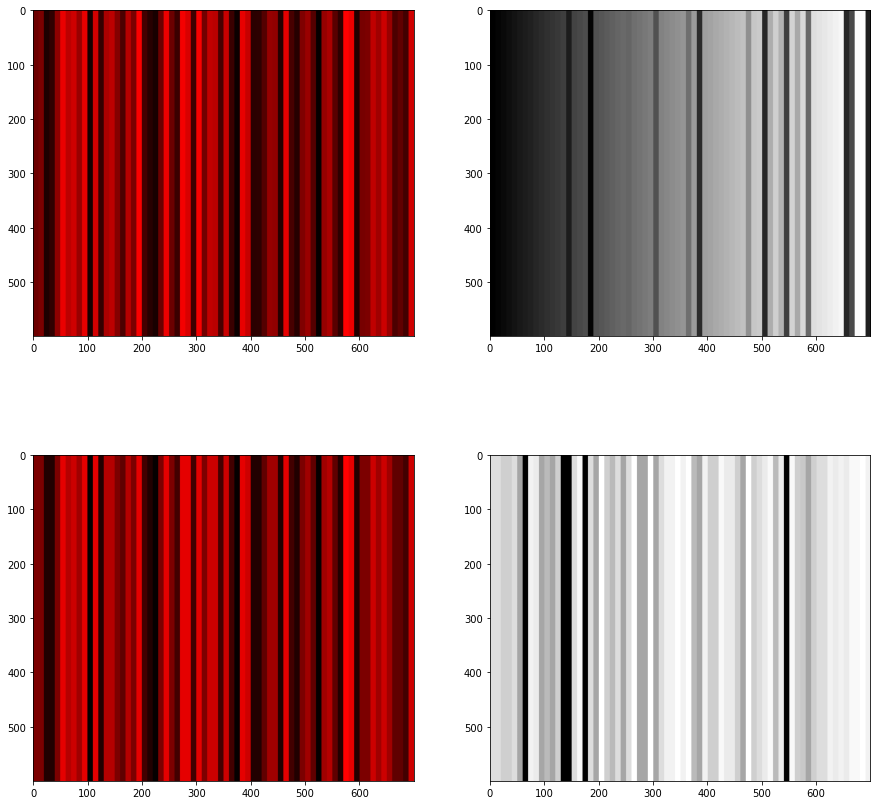

In [288]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/First Sample.bmp')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 20)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

## Quantization Level = 30

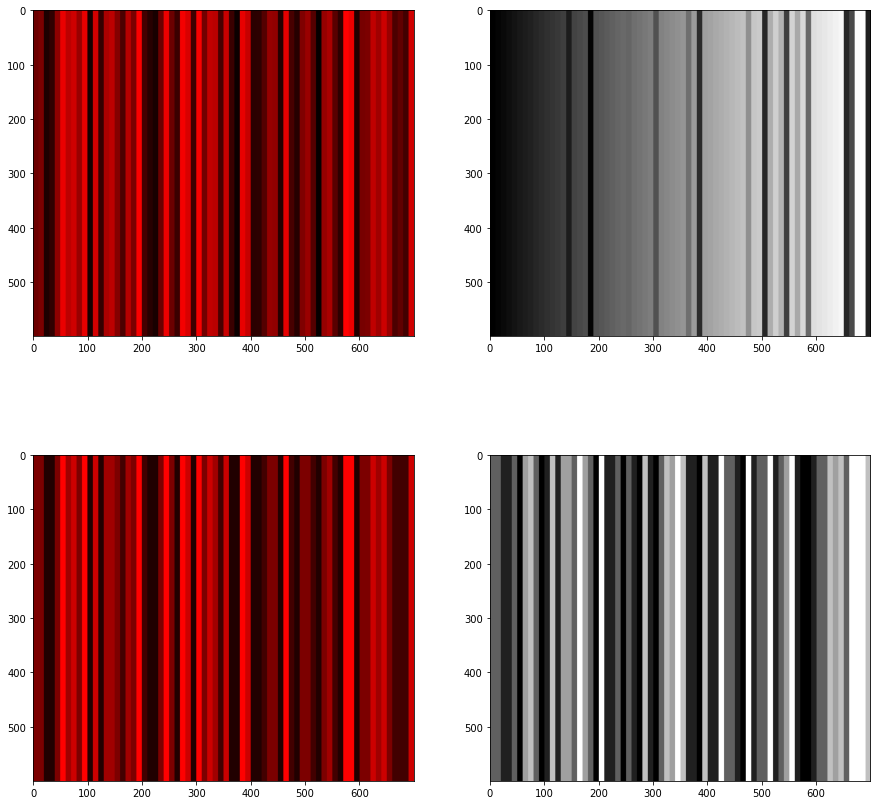

In [289]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/First Sample.bmp')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 30)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

# Second Sample Image

## Quantization Level = 10

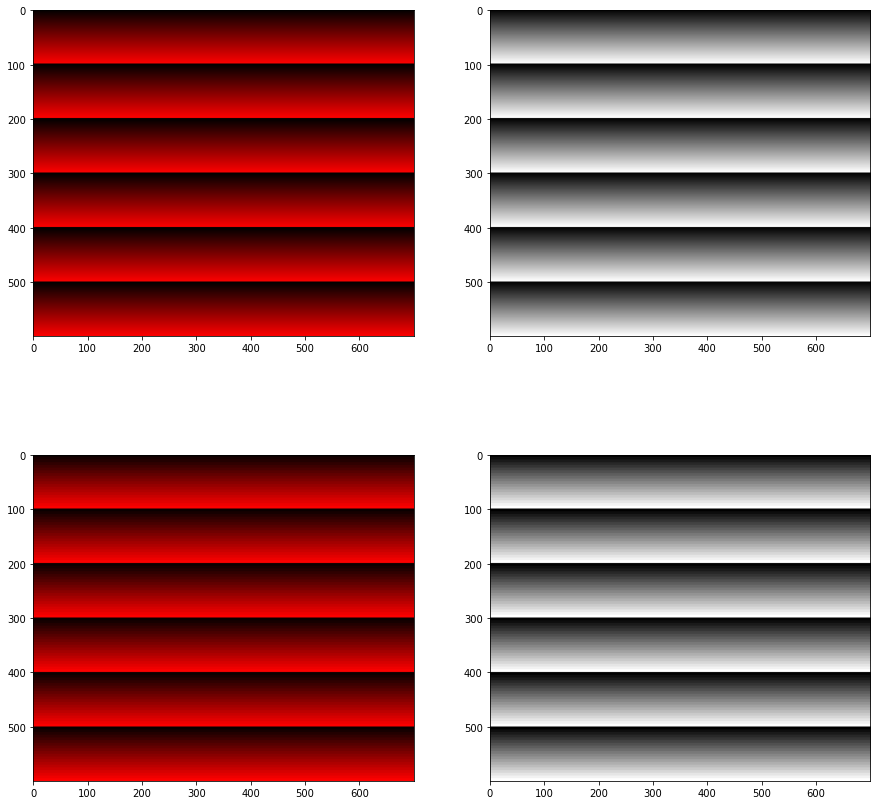

In [290]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Second Sample.bmp')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 10)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

## Quantization Level = 20

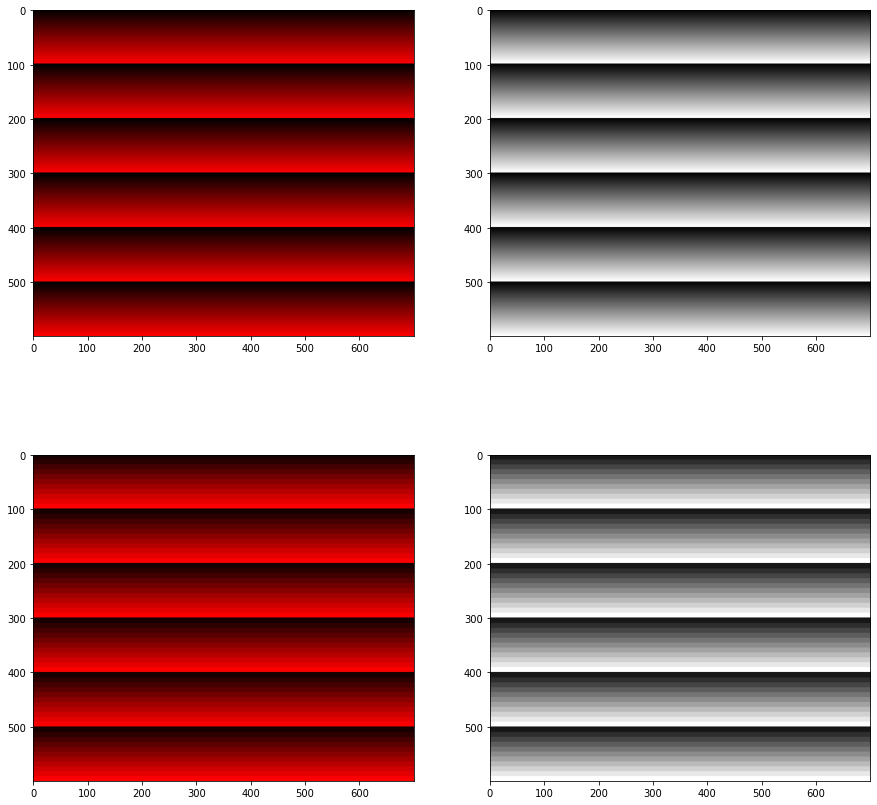

In [291]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Second Sample.bmp')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 20)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

## Quantization Level = 30

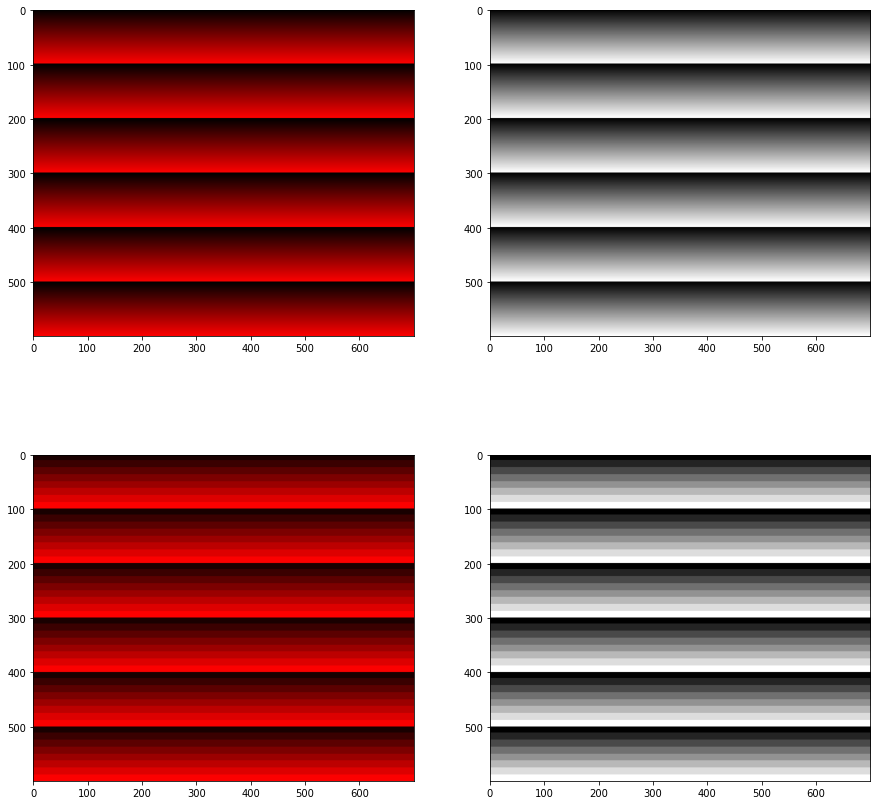

In [292]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Second Sample.bmp')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 30)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

# Third Sample Image

## Quantization Level = 10

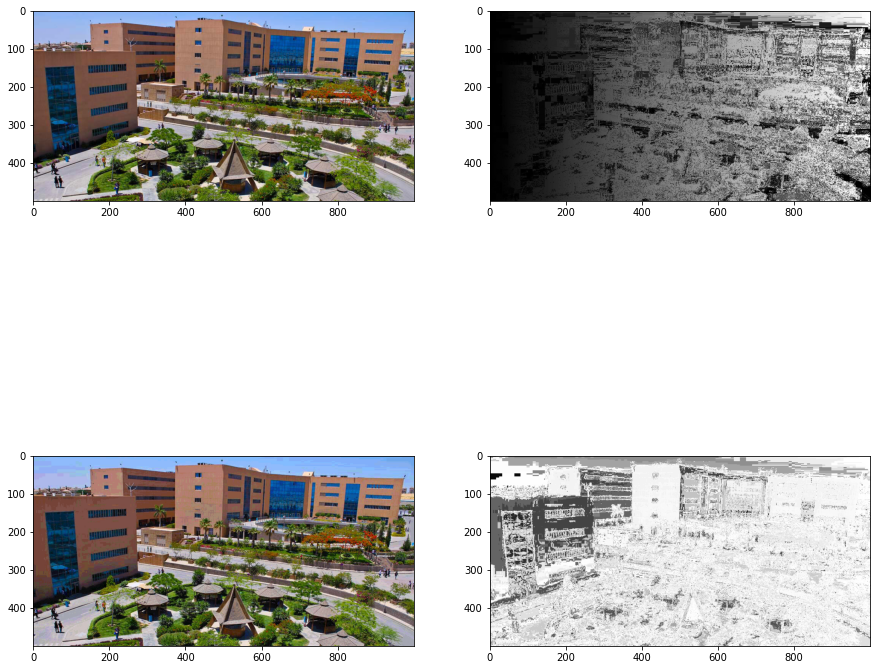

In [293]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Third Sample.jpg')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 10)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

## Quantization Level = 20

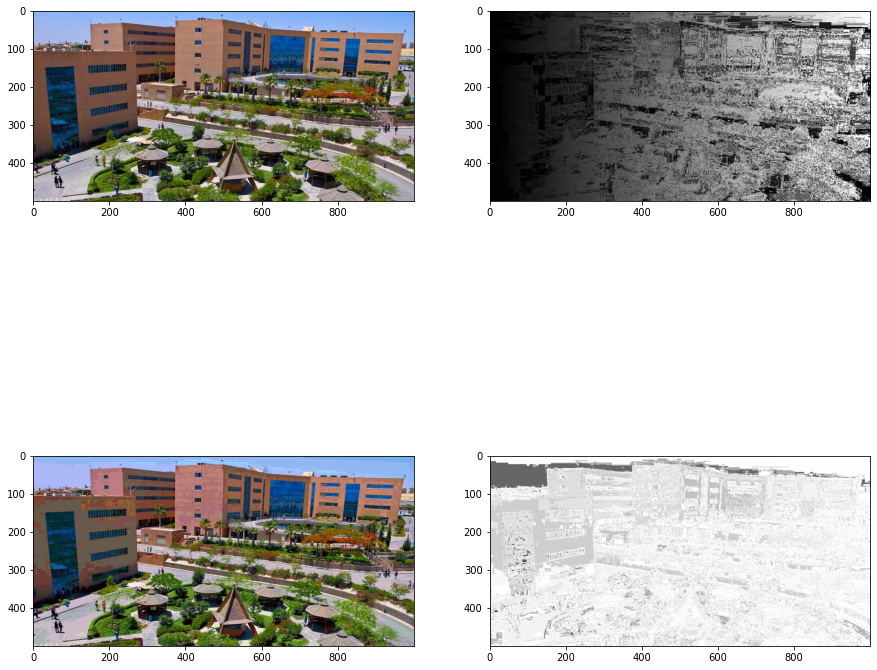

In [294]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Third Sample.jpg')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 20)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

## Quantization Level = 30

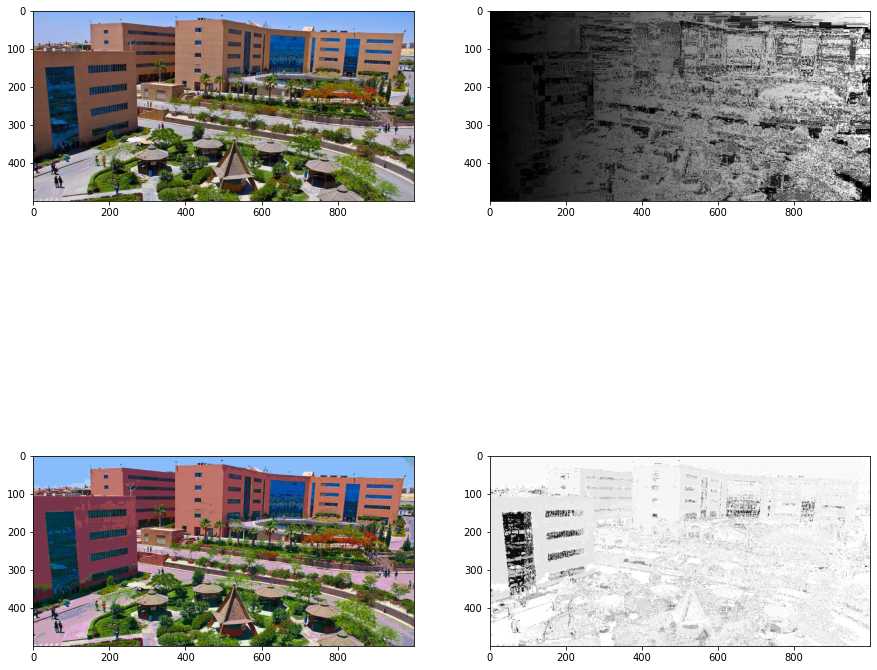

In [295]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Third Sample.jpg')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 30)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

# Test Image

## Quantization Level = 10

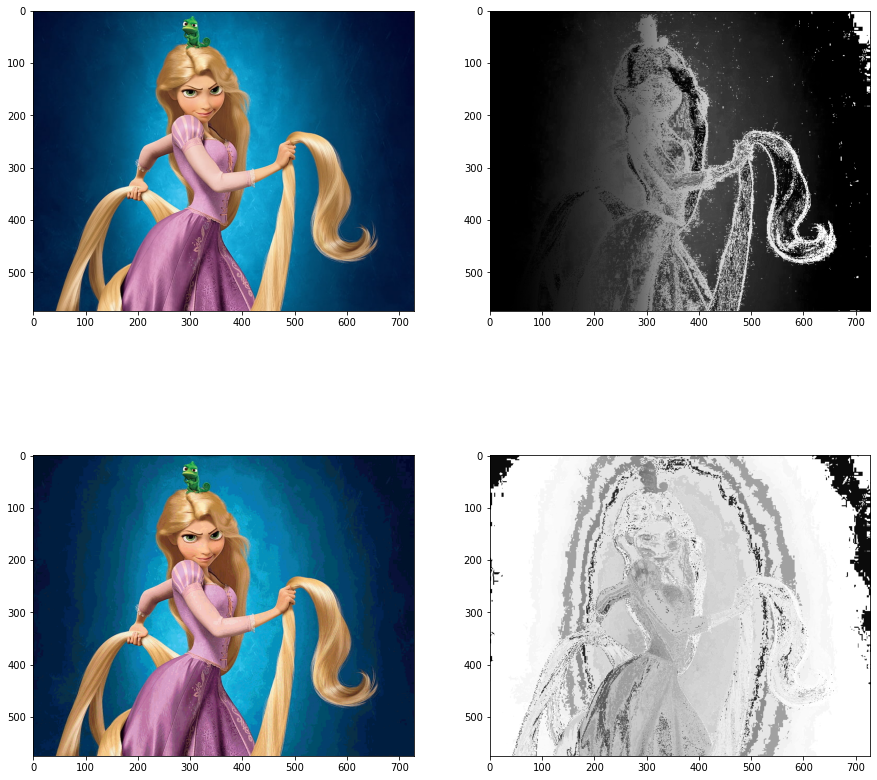

In [296]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Test Image.jpg')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 10)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

## Quantization Level = 20

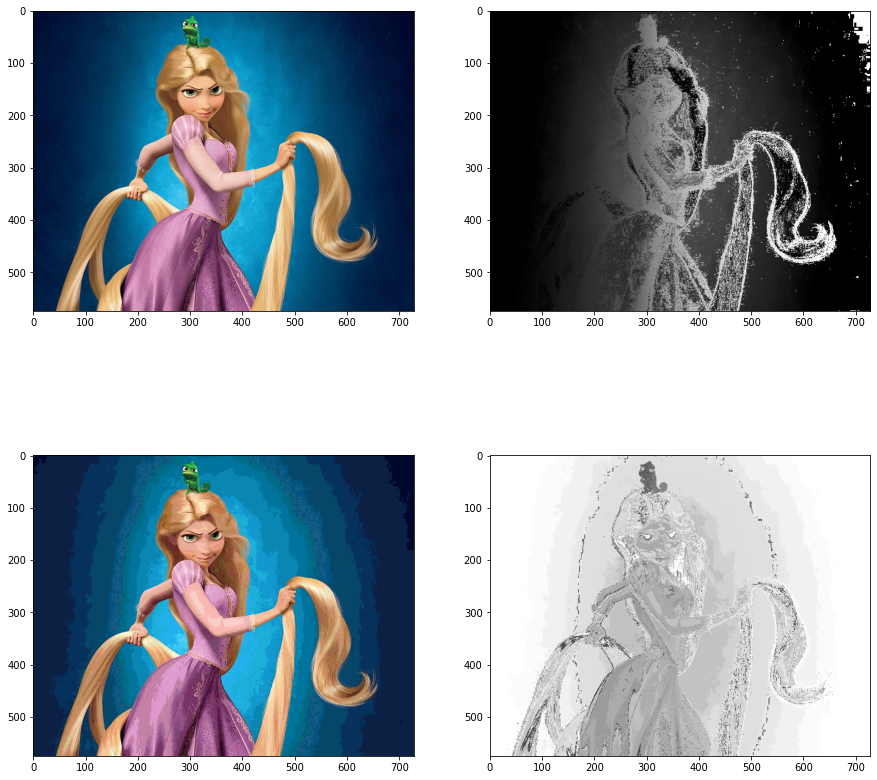

In [297]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Test Image.jpg')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 20)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)

## Quantization Level = 30

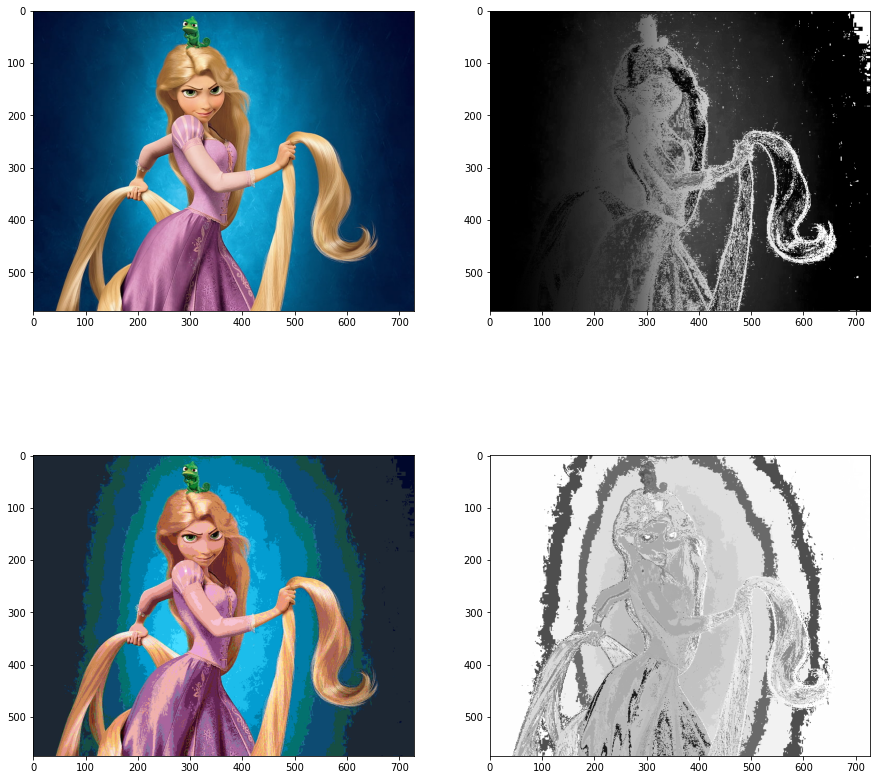

In [298]:
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

image = Image.open('Samples/Test Image.jpg')
indexMap, colorMap = CalculateColorMap(image)


plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(indexMap, cmap='gray')

quantizedColorMap, removedColors = QuantizationLevels(colorMap, 30)
adjustedIndexMap = AdjustIndex(indexMap, removedColors)

plt.subplot(2, 2, 4)
plt.imshow(adjustedIndexMap, cmap='gray')

reversedColorMap = ReverseColorMap(quantizedColorMap)


img = ColorMapToImage(adjustedIndexMap, reversedColorMap)

plt.subplot(2, 2, 3)
plt.imshow(img)